In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import pickle

from IPython.display import display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
img_name = []
for i in range(90, 130, 10):
#     img_name = glob.glob('./sample_image/pracimg_name/resize/'+str(i)+'/*.png')
    tmp = glob.glob('../sample_image/pracimages/resize4/'+str(i)+'/*.png')
    img_name += tmp
    
img_name

['../sample_image/pracimages/resize4/90/p01img01_09569.png',
 '../sample_image/pracimages/resize4/90/p01img08_09710.png',
 '../sample_image/pracimages/resize4/90/p06img04_09613.png',
 '../sample_image/pracimages/resize4/90/p02img15_09494.png',
 '../sample_image/pracimages/resize4/90/p01img11_09277.png',
 '../sample_image/pracimages/resize4/90/p02img13_09322.png',
 '../sample_image/pracimages/resize4/90/p02img11_09389.png',
 '../sample_image/pracimages/resize4/90/p02img20_09079.png',
 '../sample_image/pracimages/resize4/90/p05img16_09259.png',
 '../sample_image/pracimages/resize4/90/p02img12_09222.png',
 '../sample_image/pracimages/resize4/90/p05img07_09732.png',
 '../sample_image/pracimages/resize4/90/p02img18_09122.png',
 '../sample_image/pracimages/resize4/90/p05img01_09724.png',
 '../sample_image/pracimages/resize4/90/p05img08_09549.png',
 '../sample_image/pracimages/resize4/90/p07img12_09068.png',
 '../sample_image/pracimages/resize4/90/p03img04_09880.png',
 '../sample_image/pracim

In [3]:
pid = []
weight = []
# image = []
for i, img in zip(range(len(img_name)), img_name):
    if img_name[i][37] == '/':
        pid.append(img_name[i][38:46])
        weight.append(img_name[i][47:52])
    else:
        pid.append(img_name[i][39:47])
        weight.append(img_name[i][48:53])
        
#     img = cv2.imread(img)
#     img = img[50:300, 0:550]
#     images.append(img)

#     plt.imshow(img, interpolation='bicubic')
#     plt.xlabel(pid[i]+'*'+weight[i])
#     plt.show()
    
weight = np.array(weight).astype(int)
weight = weight / 100

In [4]:
# df = pd.DataFrame(data={'pid': pid, 'weight': weight, 'image':image})
df = pd.DataFrame(data={'pid': pid, 'weight': weight})
df.sort_values('pid', inplace=True)
df.reset_index(inplace=True, drop=True)
df.tail()

,pid,weight
555,p28img16,121.22
556,p28img17,124.70
557,p28img18,120.82
558,p28img19,121.72
559,p28img20,124.12


In [5]:
images = []
for img in img_name:
    img = cv2.imread(img)
    images.append(img)
    
df['images'] = images
df.tail()

,pid,weight,images
555,p28img16,121.22,"[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8..."
556,p28img17,124.70,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."
557,p28img18,120.82,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6..."
558,p28img19,121.72,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
559,p28img20,124.12,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."


In [2]:
# # make pickle 
# with open("../pickle/sample_df.bin", 'wb') as f:
#     pickle.dump(df, f)

# read pickle file
with open("../pickle/sample_df.bin", "rb") as f:
    df = pickle.load(f)

In [3]:
df.tail()

,pid,weight,images
555,p28img16,121.22,"[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8..."
556,p28img17,124.70,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."
557,p28img18,120.82,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6..."
558,p28img19,121.72,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
559,p28img20,124.12,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."


In [6]:
# hand crop images
hcrop_id=['p27img10', 'p27img12', 'p23img07', 'p23img12', 'p28img13', 'p23img08',
           'p27img11', 'p23img03', 'p27img06', 'p23img06', 'p23img02', 'p23img09',
           'p27img17', 'p23img01', 'p27img08', 'p27img02', 'p23img05', 'p27img09',
           'p27img03', 'p27img01', 'p27img04', 'p23img10', 'p27img05', 'p27img07', 'p23img04']

In [7]:
crop_img = []
crop_id = []
# for pid, img in zip(df.pid, df.images):

for i in range(len(df)):
    if df.pid[i] not in hcrop_id: 
#         img = df.images[i][50:300, 0:550]
        crop_id.append(df.pid[i])
#         crop_img.append(img)
        

In [25]:
# # make pickle 
with open("../pickle/new/crop_id.bin", 'wb') as f:
    pickle.dump(crop_id, f)

with open("../pickle/new/hcrop_id.bin", 'wb') as f:
    pickle.dump(hcrop_id, f)

In [15]:
# read pickle file
with open("../pickle/sample_crop_img.bin", "rb") as f:
    crop_img = pickle.load(f)

# read pickle file
with open("../pickle/sample_hcrop_img.bin", "rb") as f:
    hcrop_img = pickle.load(f)

In [12]:
# crop_img = np.asarray(crop_img)
# hcrop_img = np.asarray(hcrop_img)

In [16]:
len(crop_id), len(hcrop_id), crop_img.shape, hcrop_img.shape

AttributeError: 'list' object has no attribute 'shape'

In [17]:
crop = pd.DataFrame(data={'pid': crop_id, 'images': crop_img})
crop.tail()

,images,pid
530,"[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8...",p28img16
531,"[[[103, 108, 107], [103, 108, 107], [103, 108,...",p28img17
532,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6...",p28img18
533,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...",p28img19
534,"[[[103, 108, 107], [103, 108, 107], [103, 108,...",p28img20


In [18]:
hcrop = pd.DataFrame(data={'pid': hcrop_id, 'images': hcrop_img})
hcrop.tail()

,images,pid
20,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6...",p27img04
21,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...",p23img10
22,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...",p27img05
23,"[[[103, 108, 107], [103, 108, 107], [103, 108,...",p27img07
24,"[[[73, 83, 82], [73, 83, 82], [73, 83, 82], [7...",p23img04


In [19]:
crop_all = pd.concat([crop, hcrop])
crop_all = crop_all.set_index('pid')
crop_all.tail()

,images
pid,
p27img04,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6..."
p23img10,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
p27img05,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
p27img07,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."
p23img04,"[[[73, 83, 82], [73, 83, 82], [73, 83, 82], [7..."


In [20]:
df["crop_images"] = df["pid"].map(crop_all.images)

In [21]:
df.tail()

,pid,weight,crop_images
555,p28img16,121.22,"[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8..."
556,p28img17,124.70,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."
557,p28img18,120.82,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6..."
558,p28img19,121.72,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
559,p28img20,124.12,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."


In [22]:
# make pickle 
with open("../pickle/sample560_crop_df.bin", 'wb') as f:
    pickle.dump(df, f)

# # read pickle file
# with open("../pickle/sample560_crop_df.bin", "rb") as f:
#     df = pickle.load(f)

In [10]:
# del pid, weight, image

In [9]:
type(crop_img), np.shape(crop_img), len(crop_id)

(list, (535, 250, 550, 3), 535)

In [13]:
# # make pickle 
# with open("../pickle/sample_crop_img.bin", 'wb') as f:
#     pickle.dump(crop_img, f)

# # read pickle file
# with open("../pickle/sample_crop_img.bin", "rb") as f:
#     crop_img = pickle.load(f)

In [13]:
hcrop_img = []

In [191]:
# handcrop the images
top = 50
left = 0
img = df["images"].loc[df[df.pid == ls[25]].index.values[0]][top:top+250, left:left+550]
print(np.shape(img), type(img))
plt.imshow(img, interpolation='bicubic')
plt.show()
# hcrop_img.append(img)

IndexError: list index out of range

In [192]:
np.shape(hcrop_img)

(25, 250, 550, 3)

In [10]:
# # make pickle 
# with open("../pickle/sample_hcrop_img.bin", 'wb') as f:
#     pickle.dump(hcrop_img, f)

# read pickle file
with open("../pickle/sample_hcrop_img.bin", "rb") as f:
    hcrop_img = pickle.load(f)

In [11]:
type(hcrop_img), np.shape(hcrop_img), len(hcrop_id)

(list, (25, 250, 550, 3), 25)

In [12]:
hcrop = pd.DataFrame(data={'pid': hcrop_id, 'images': hcrop_img})
hcrop.tail()

,images,pid
20,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6...",p27img04
21,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...",p23img10
22,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...",p27img05
23,"[[[103, 108, 107], [103, 108, 107], [103, 108,...",p27img07
24,"[[[73, 83, 82], [73, 83, 82], [73, 83, 82], [7...",p23img04


In [13]:
crop = pd.DataFrame(data={'pid': crop_id, 'images': crop_img})
crop.tail()

,images,pid
530,"[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8...",p28img16
531,"[[[103, 108, 107], [103, 108, 107], [103, 108,...",p28img17
532,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6...",p28img18
533,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...",p28img19
534,"[[[103, 108, 107], [103, 108, 107], [103, 108,...",p28img20


In [14]:
crop_all = pd.concat([crop, hcrop])
crop_all = crop_all.set_index('pid')
crop_all.tail()

,images
pid,
p27img04,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6..."
p23img10,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
p27img05,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
p27img07,"[[[103, 108, 107], [103, 108, 107], [103, 108,..."
p23img04,"[[[73, 83, 82], [73, 83, 82], [73, 83, 82], [7..."


In [218]:
len(crop_all)

560

In [15]:
df["crop_images"] = df["pid"].map(crop_all.images)

In [16]:
df.tail()

,pid,weight,images,crop_images
555,p28img16,121.22,"[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8...","[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8..."
556,p28img17,124.70,"[[[103, 108, 107], [103, 108, 107], [103, 108,...","[[[103, 108, 107], [103, 108, 107], [103, 108,..."
557,p28img18,120.82,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6...","[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6..."
558,p28img19,121.72,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...","[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
559,p28img20,124.12,"[[[103, 108, 107], [103, 108, 107], [103, 108,...","[[[103, 108, 107], [103, 108, 107], [103, 108,..."


In [17]:
# # make pickle 
# with open("../pickle/sample_crop_df.bin", 'wb') as f:
#     pickle.dump(df, f)

# read pickle file
with open("../pickle/sample_crop_df.bin", "rb") as f:
    df = pickle.load(f)

In [221]:
df.tail()

,pid,weight,images,crop_images
555,p28img16,121.22,"[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8...","[[[80, 89, 88], [80, 89, 88], [80, 89, 88], [8..."
556,p28img17,124.70,"[[[103, 108, 107], [103, 108, 107], [103, 108,...","[[[103, 108, 107], [103, 108, 107], [103, 108,..."
557,p28img18,120.82,"[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6...","[[[68, 78, 77], [68, 78, 77], [68, 78, 77], [6..."
558,p28img19,121.72,"[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6...","[[[62, 76, 75], [62, 76, 75], [62, 76, 75], [6..."
559,p28img20,124.12,"[[[103, 108, 107], [103, 108, 107], [103, 108,...","[[[103, 108, 107], [103, 108, 107], [103, 108,..."


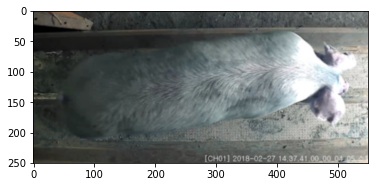

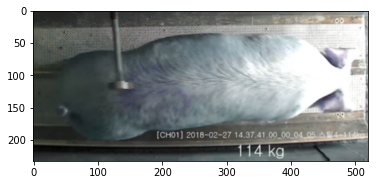

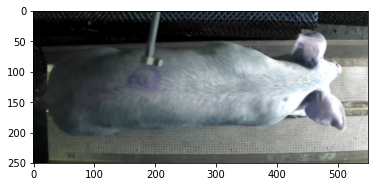

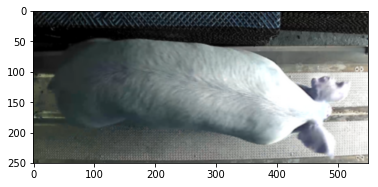

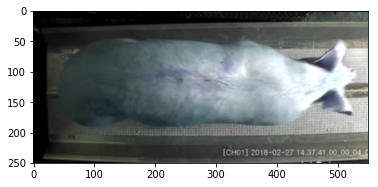

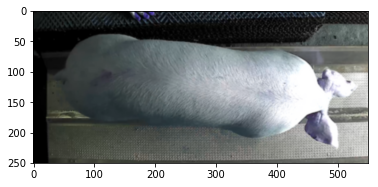

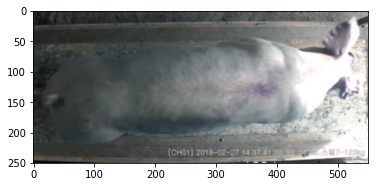

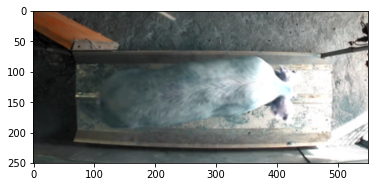

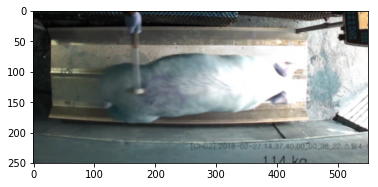

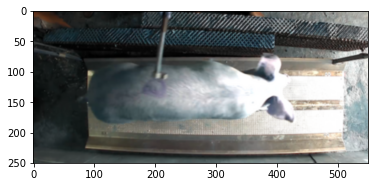

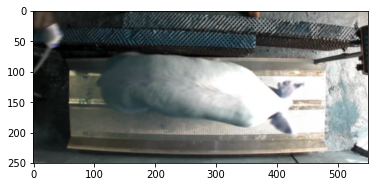

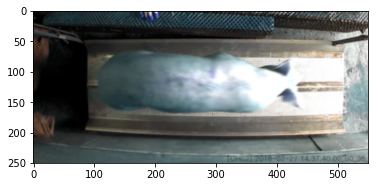

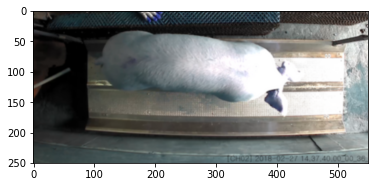

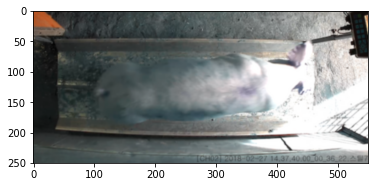

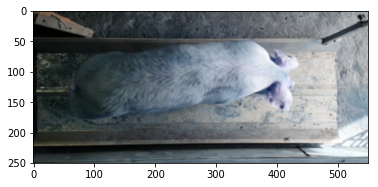

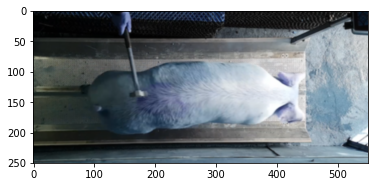

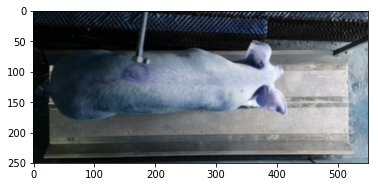

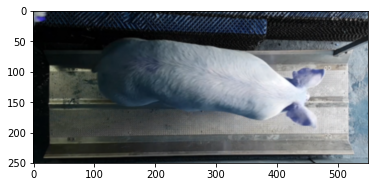

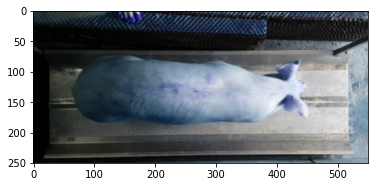

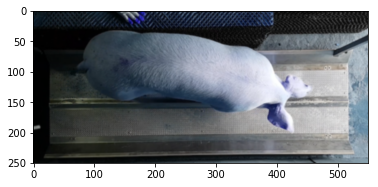

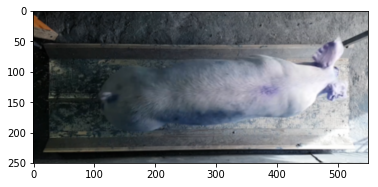

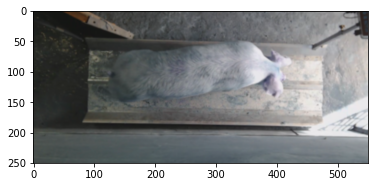

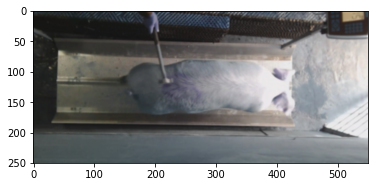

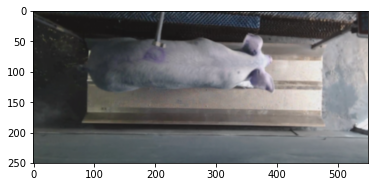

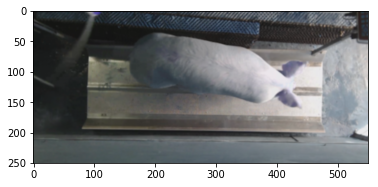

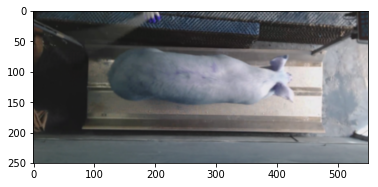

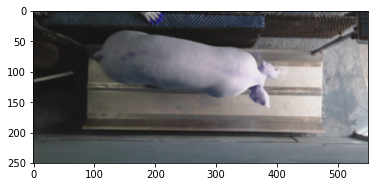

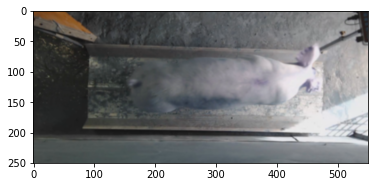

In [212]:
for img in df.image:
    plt.imshow(img, interpolation='bicubic')
    plt.show()